In [1]:
import matplotlib.pyplot as plt
from generate_plots import convert_tb_data

In [2]:
def generate_plot(df, col_name, title=None, filter_outliers=False, rolling_mean=False):
    df_filtered = df[df.name == col_name].reset_index(drop=True)
    # Filter outliers:
    if filter_outliers:
        df_filtered = df_filtered[df_filtered.value <= df_filtered.iloc[:10].max().value * 2]
    if rolling_mean:
        df_filtered.value = df_filtered.value.rolling(100).median()
    fig, ax = plt.subplots(1,1)
    df_filtered[['value']].plot(ax=ax)
    ax.set_title(title)
    ax.set(xlabel="Episodes")
    ax.legend().remove()
    # ax.set_ylim([0, 0.3 * 1e9])
    ax.grid()
    fig.set_size_inches(7, 3.5)
    return fig, ax



def format_plot(session_id, run_id, col_name="losses/q_loss", filter_outliers=False, rolling_mean=True):
    FILE_PATH = f"../models/experiment_runs/session{session_id}_run{run_id}/logs"
    df = convert_tb_data(FILE_PATH)
    fig, _ = generate_plot(df, col_name, title=f"Session {session_id} - Run {run_id}: Q-Loss", filter_outliers=filter_outliers, rolling_mean=rolling_mean)
    fig.savefig(f"./plots/session_{session_id}_run_{run_id}_q_loss")
    return df

In [87]:
df = format_plot(4, 1, rolling_mean=True)

DataLossError: corrupted record at 51268468

In [88]:
def plot_agent_loss(session_id, run_id, agent_num, filter_outliers=True):
    FILE_PATH = f"../models/experiment_runs/session{session_id}_run{run_id}/logs"
    df = convert_tb_data(FILE_PATH)

    col_name = lambda i: f"agent{i}/losses/pol_loss"
    fig, ax = plt.subplots(agent_num, 1)
    for i in range(agent_num):
        df_filtered = df[df.name == col_name(i)].reset_index(drop=True)
        if filter_outliers:
            df_filtered = df_filtered[df_filtered.value <= df_filtered.iloc[:10].max().value * 2]
        df_filtered.value = df_filtered.value.rolling(10).median()
        df_filtered[['value']].plot(ax=ax[i])
        ax[i].set_title(f"Agent {i}")
        ax[i].set(xlabel="Episodes")
        ax[i].legend().remove()
        # ax.set_ylim([0, 0.3 * 1e9])
        ax[i].grid()
        plt.tight_layout()
        fig.set_size_inches(7, 5)
        fig.suptitle(f"Session {session_id} - Run {run_id}: Q-Loss")
    fig.savefig(f"./plots/session_{session_id}_run_{run_id}_q_loss_agent")

In [89]:
plot_agent_loss(4, 1, 2)

DataLossError: corrupted record at 51268468

In [85]:
def plot_agent_reward(session_id, run_id, agent_num, filter_outliers=False):
    FILE_PATH = f"../models/experiment_runs/session{session_id}_run{run_id}/logs"
    df = convert_tb_data(FILE_PATH)

    col_name = lambda i: f"agent{i}/mean_episode_rewards"
    fig, ax = plt.subplots(agent_num, 1)
    for i in range(agent_num):
        df_filtered = df[df.name == col_name(i)].reset_index(drop=True)
        if filter_outliers:
            df_filtered = df_filtered[df_filtered.value <= df_filtered.iloc[:10].max().value * 2]
        df_filtered.value = df_filtered.value.rolling(10).median()
        df_filtered[['value']].plot(ax=ax[i])
        ax[i].set_title(f"Agent {i}")
        ax[i].set(xlabel="Episodes")
        ax[i].legend().remove()
        # ax.set_ylim([0, 0.3 * 1e9])
        ax[i].grid()
        plt.tight_layout()
        fig.set_size_inches(7, 5)
        fig.suptitle(f"Session {session_id} - Run {run_id}: Mean Episode Rewards")
    fig.savefig(f"./plots/session_{session_id}_run_{run_id}_mean_reward_agent")

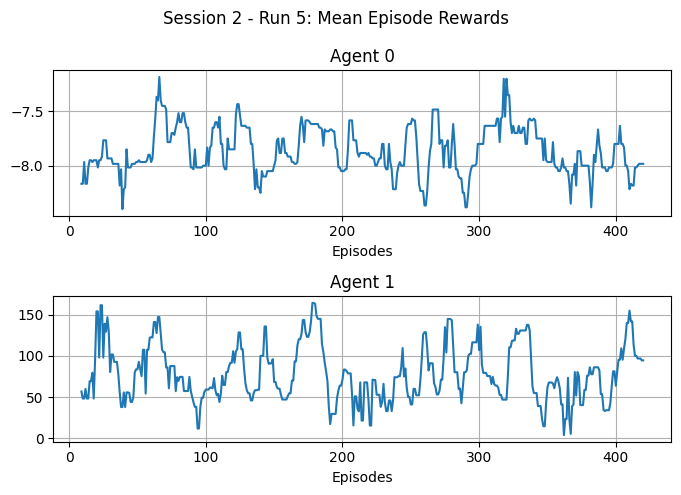

In [86]:
plot_agent_reward(2, 5, 2)

In [72]:
session_id = 2
run_id = 5
FILE_PATH = f"../models/experiment_runs/session{session_id}_run{run_id}/logs"
df = convert_tb_data(FILE_PATH)

In [73]:
df[df.name == "losses/q_loss"]

,wall_time,name,step,value
0,1.686844e+09,losses/q_loss,0,1.176808e+09
8,1.686844e+09,losses/q_loss,1,1.183064e+09
16,1.686844e+09,losses/q_loss,2,1.143251e+09
24,1.686844e+09,losses/q_loss,3,1.078887e+09
32,1.686844e+09,losses/q_loss,4,1.076419e+09
...,...,...,...,...
60734,1.686844e+09,losses/q_loss,5043,2.263560e+05
60742,1.686844e+09,losses/q_loss,5044,3.508837e+06
60750,1.686844e+09,losses/q_loss,5045,6.311395e+05
60758,1.686844e+09,losses/q_loss,5046,5.222483e+05


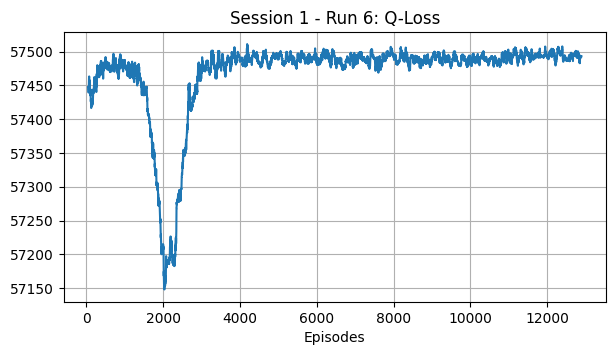

In [222]:
col_name = "agent1/losses/pol_loss"
fig = generate_plot(df, col_name, title=f"Session {session_id} - Run {run_id}: Q-Loss", filter_outliers=False, rolling_mean=True)